<a href="https://colab.research.google.com/github/LIKHITA12/creditcard-fraud/blob/master/Fraudulent_creditcard_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUDULENT DETECTION**

**Importing packages**

In [0]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [0]:
df = pd.read_csv('creditcard.csv')
df.head()

Time     V1     V2     V3     V4  ...    V26    V27    V28  Amount  Class
0   0.0 -1.360 -0.073  2.536  1.378  ... -0.189  0.134 -0.021  149.62      0
1   0.0  1.192  0.266  0.166  0.448  ...  0.126 -0.009  0.015    2.69      0
2   1.0 -1.358 -1.340  1.773  0.380  ... -0.139 -0.055 -0.060  378.66      0
3   1.0 -0.966 -0.185  1.793 -0.863  ... -0.222  0.063  0.061  123.50      0
4   2.0 -1.158  0.878  1.549  0.403  ...  0.502  0.219  0.215   69.99      0

[5 rows x 31 columns]

In [0]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [0]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

The Data Distribution

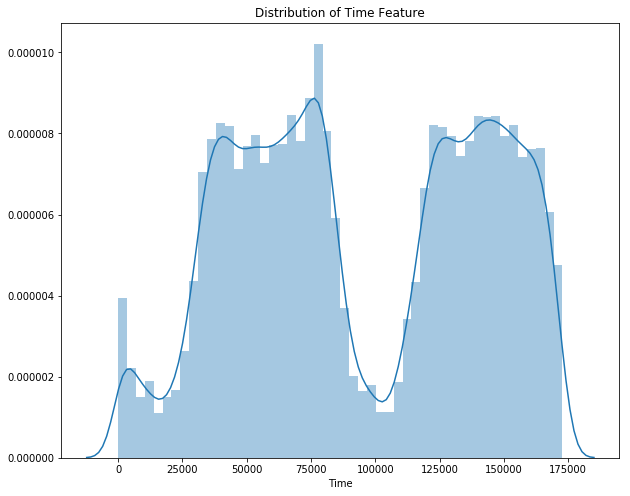

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

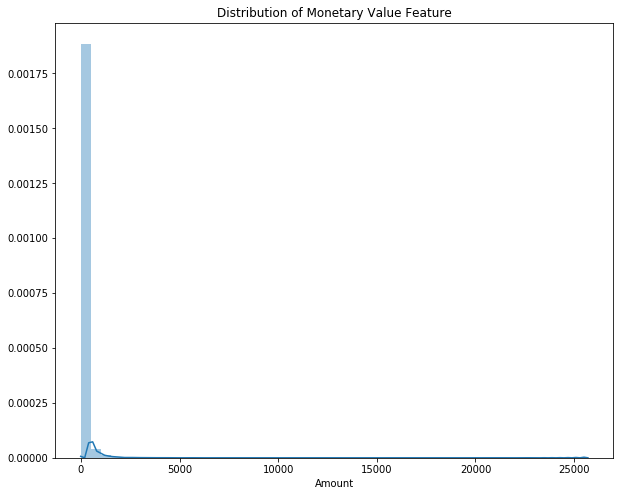

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Text(0, 0.5, 'Density')

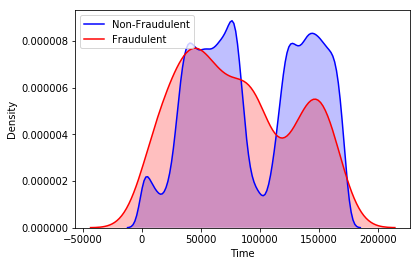

In [0]:
sns.kdeplot(df.loc[(df['Class']==0), 
            'Time'], color='b', shade=True, Label='Non-Fraudulent') 
  
sns.kdeplot(df.loc[(df['Class']==1),  
            'Time'], color='r', shade=True, Label='Fraudulent') 
  
plt.xlabel('Time') 
plt.ylabel('Density') 

Text(0, 0.5, 'Density')

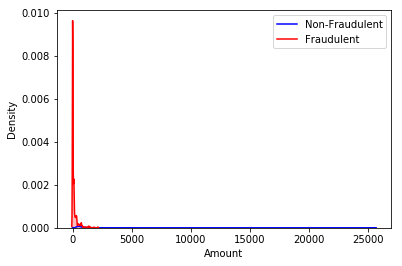

In [0]:
sns.kdeplot(df.loc[(df['Class']==0), 
            'Amount'], color='b', shade=True, Label='Non-Fraudulent') 
  
sns.kdeplot(df.loc[(df['Class']==1),  
            'Amount'], color='r', shade=True, Label='Fraudulent') 
  
plt.xlabel('Amount') 
plt.ylabel('Density') 

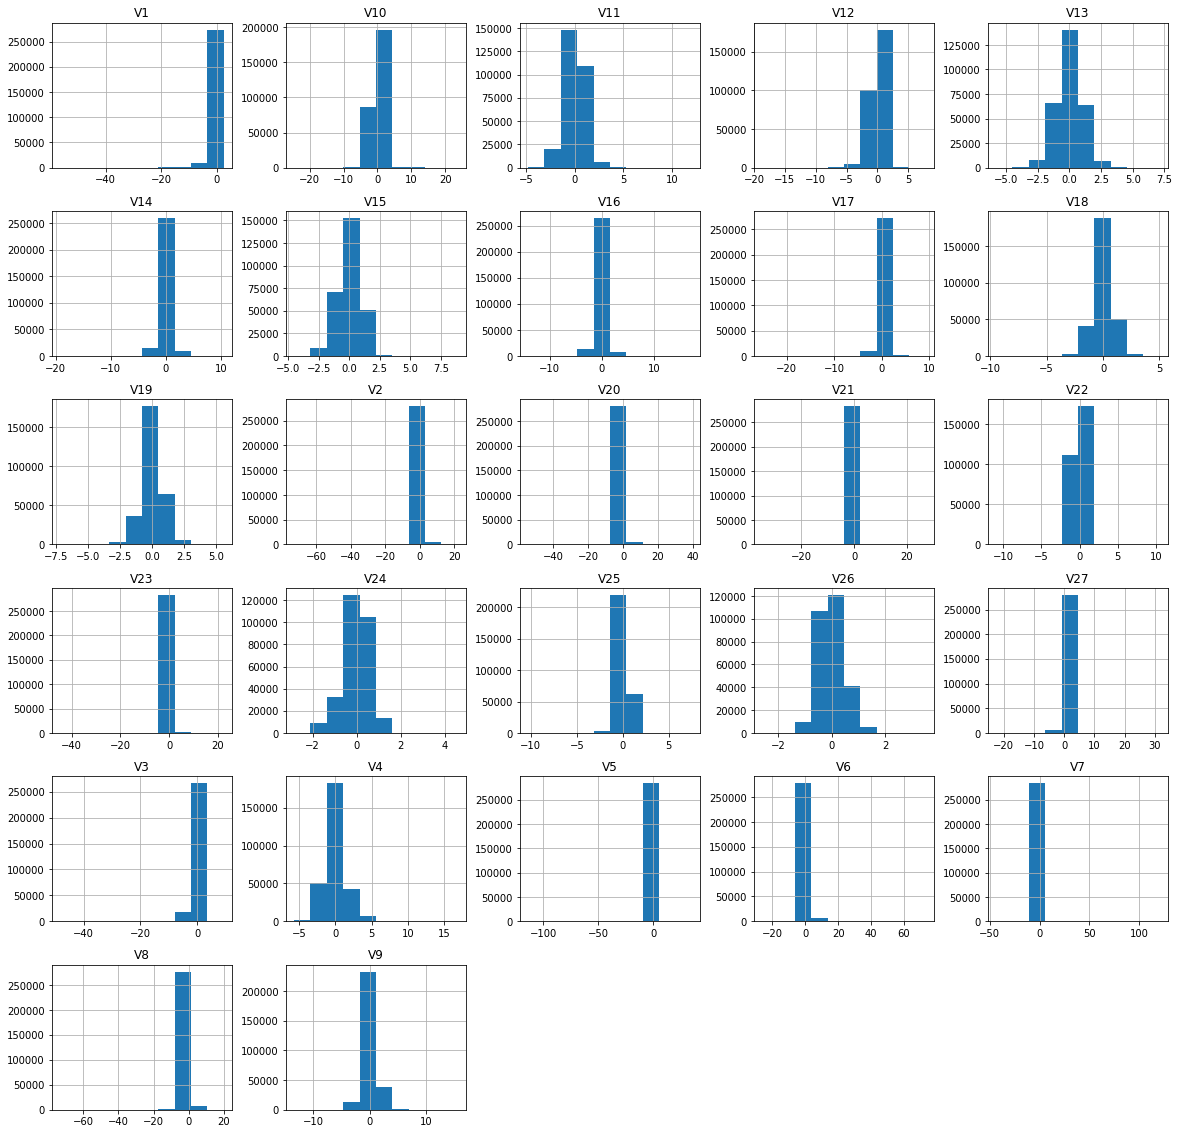

In [0]:
features = ['V%d' % number for number in range(1, 28)]
X = df[features]
X.hist(figsize = (20, 20))
plt.show()

**Count of Fradulent and non-fraudulent transactions**

In [0]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

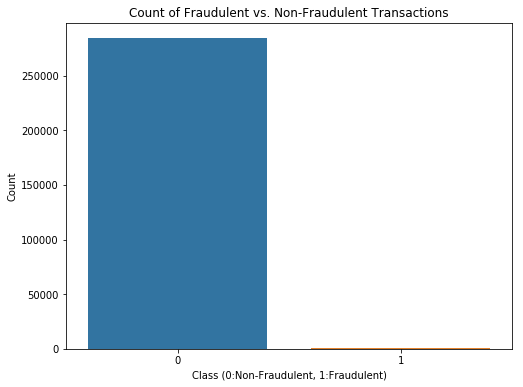

In [0]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

**Correlation of dataframe**

In [0]:
corr = df.corr()
corr

Time         V1         V2  ...        V28     Amount      Class
Time    1.000  1.174e-01 -1.059e-02  ... -9.413e-03 -1.060e-02 -1.232e-02
V1      0.117  1.000e+00  4.697e-17  ...  9.821e-16 -2.277e-01 -1.013e-01
V2     -0.011  4.697e-17  1.000e+00  ... -3.676e-16 -5.314e-01  9.129e-02
V3     -0.420 -1.424e-15  2.512e-16  ...  7.727e-16 -2.109e-01 -1.930e-01
V4     -0.105  1.755e-17 -1.126e-16  ... -5.864e-17  9.873e-02  1.334e-01
V5      0.173  6.391e-17 -2.040e-16  ... -3.299e-16 -3.864e-01 -9.497e-02
V6     -0.063  2.398e-16  5.025e-16  ...  4.813e-16  2.160e-01 -4.364e-02
V7      0.085  1.992e-15  3.966e-16  ... -6.837e-17  3.973e-01 -1.873e-01
V8     -0.037 -9.491e-17 -4.414e-17  ... -4.484e-16 -1.031e-01  1.988e-02
V9     -0.009  2.170e-16 -5.729e-17  ...  9.147e-16 -4.425e-02 -9.773e-02
V10     0.031  7.434e-17 -4.782e-16  ... -1.516e-16 -1.015e-01 -2.169e-01
V11    -0.248  2.439e-16  9.469e-16  ... -3.092e-16  1.040e-04  1.549e-01
V12     0.124  2.422e-16 -6.588e-16  ...  7.327e-16 -9.542e-03 -2.606e-01
V13    -0.066 -2.115e-16  3.855e-16  ...  1.050e-15  5.293e-03 -4.570e-03
V14    -0.099  9.353e-16 -2.541e-16  ...  2.503e-15  3.375e-02 -3.025e-01
V15    -0.183 -3.252e-16  2.831e-16  ... -1.063e-15 -2.986e-03 -4.223e-03
V16     0.012  6.309e-16  4.934e-17  ...  8.637e-16 -3.910e-03 -1.965e-01
V17    -0.073 -5.012e-16 -9.883e-16  ... -2.183e-16  7.309e-03 -3.265e-01
V18     0.090  2.870e-16  2.637e-16  ...  8.845e-16  3.565e-02 -1.115e-01
V19     0.029  1.818e-16  9.528e-17  ... -1.376e-15 -5.615e-02  3.478e-02
V20    -0.051  1.037e-16 -9.310e-16  ... -1.134e-16  3.394e-01  2.009e-02
V21     0.045 -1.755e-16  8.444e-17  ...  5.132e-16  1.060e-01  4.041e-02
V22     0.144  7.477e-17  2.501e-16  ... -3.021e-16 -6.480e-02  8.053e-04
V23     0.051  9.809e-16  1.060e-16  ...  9.030e-16 -1.126e-01 -2.685e-03
V24    -0.016  7.354e-17 -8.142e-18  ... -2.259e-16  5.146e-03 -7.221e-03
V25    -0.233 -9.805e-16 -4.262e-17  ...  3.399e-16 -4.784e-02  3.308e-03
V26    -0.041 -8.622e-17  2.602e-16  ... -3.751e-16 -3.208e-03  4.455e-03
V27    -0.005  3.208e-17 -4.478e-16  ... -3.770e-16  2.883e-02  1.758e-02
V28    -0.009  9.821e-16 -3.676e-16  ...  1.000e+00  1.026e-02  9.536e-03
Amount -0.011 -2.277e-01 -5.314e-01  ...  1.026e-02  1.000e+00  5.632e-03
Class  -0.012 -1.013e-01  9.129e-02  ...  9.536e-03  5.632e-03  1.000e+00

[31 rows x 31 columns]

Text(0.5, 1.0, 'Heatmap of Correlation')

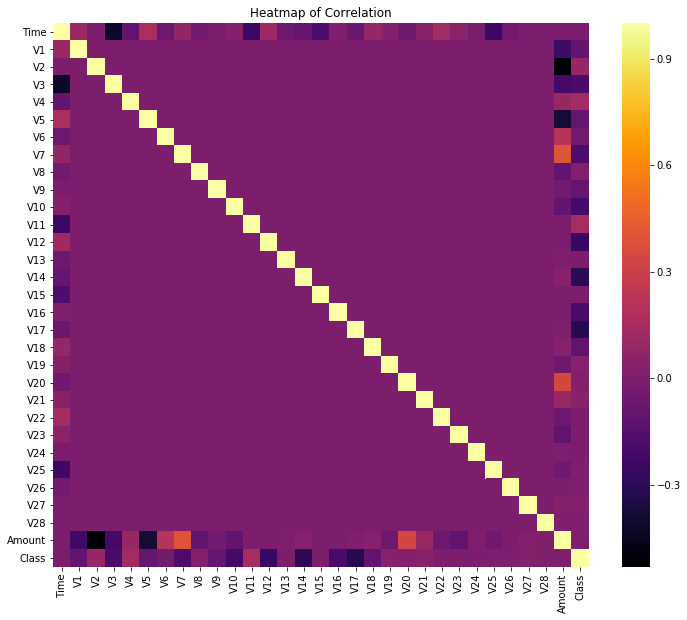

In [0]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr, cmap="inferno")
plt.title('Heatmap of Correlation')

**Scaling of dataframe**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [0]:
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [0]:
df2 = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df2.sample(5)

Time     V1     V2  ...  Class  scaled_amount  scaled_time
38389    39378.0 -0.830  0.994  ...      0         -0.093       -1.167
118842   75230.0 -1.941 -0.712  ...      0          0.339       -0.412
176180  122657.0  1.348 -1.152  ...      0          0.846        0.586
266008  162148.0  1.239 -1.714  ...      0          1.230        1.418
11751    20104.0 -1.703 -0.029  ...      0          0.084       -1.573

[5 rows x 33 columns]

In [0]:
df2.drop(['Amount', 'Time'], axis=1, inplace=True)

In [0]:
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# **SMOTE (OVERSAMPLING)**

In [0]:
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [0]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [0]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [0]:
target = 'Class'

In [0]:
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

**Preprocessing and Analysing with Logistic Regressions**

In [0]:
if len(np.sum(Y_train)) in [len(Y_train),0]:
    print ("all one class")
else:
    clf = LogisticRegression().fit(X_train, Y_train)

In [0]:
Y_Test_Pred = clf.predict(X_test)

In [0]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual         0   1
Predicted           
0          93800  78
1             38  71

In [0]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9987657867577431
Precision =  0.6513761467889908
Recall =  0.47651006711409394
F1 Score =  0.5503875968992248


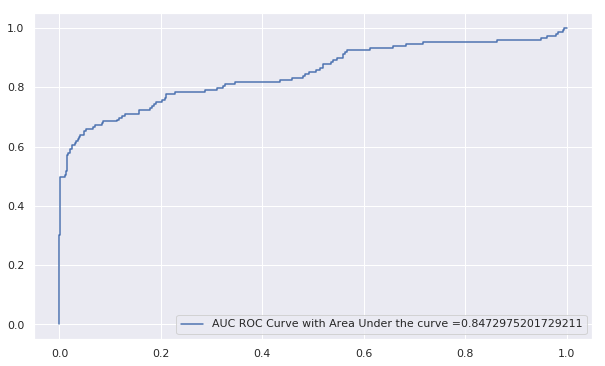

In [0]:
generate_auc_roc_curve(clf, X_test)

**SMOTE**

Best parameters : {'smote__ratio': 0.005}


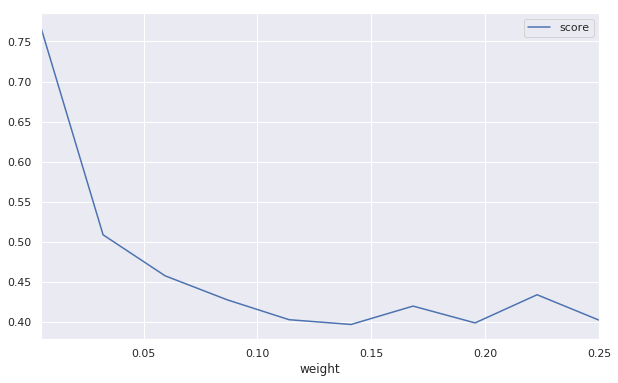

In [0]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [0]:
pipe = make_pipeline(
    SMOTE(ratio=0.005),
    LogisticRegression()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [0]:
pd.crosstab(Y_Test_Pred, Y_test[target], 
            rownames=['Predicted'], colnames=['Actual'])

Actual         0    1
Predicted            
0          93792   37
1             46  112

In [0]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9991168991456265
Precision =  0.7088607594936709
Recall =  0.7516778523489933
F1 Score =  0.7296416938110749


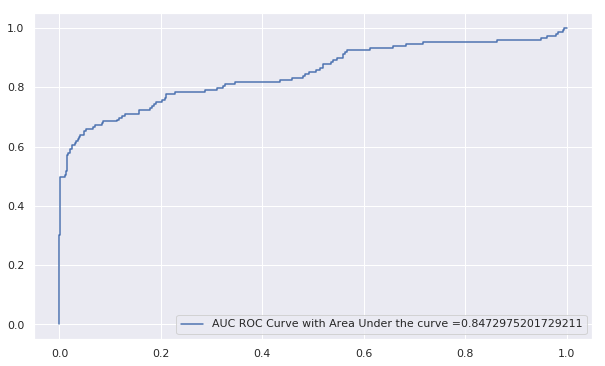

In [0]:
generate_auc_roc_curve(clf, X_test)

# **UNDERSAMPLING**

In [0]:
minority_class_len = len(df[df[target] == 1])
print("Number of Minority class :",minority_class_len)

Number of Minority class : 492


In [0]:
majority_class_indices = df[df[target] == 0].index
print("Majority class indices :",majority_class_indices)

Majority class indices : Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [0]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print("Randomly selected majority indices :",len(random_majority_indices))

Randomly selected majority indices : 492


In [0]:
minority_class_indices = df[df[target] == 1].index
print("Minority class indices :",minority_class_indices)

Minority class indices : Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


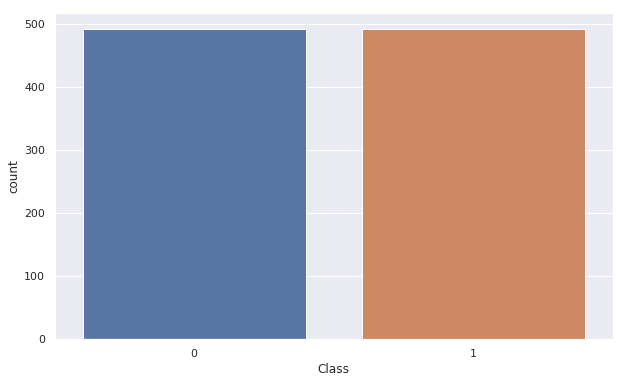

In [0]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = df.loc[under_sample_indices]
sns.countplot(x=target, data=under_sample)

In [0]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [0]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9323076923076923
Precision =  0.9733333333333334
Recall =  0.8902439024390244
F1 Score =  0.9299363057324841


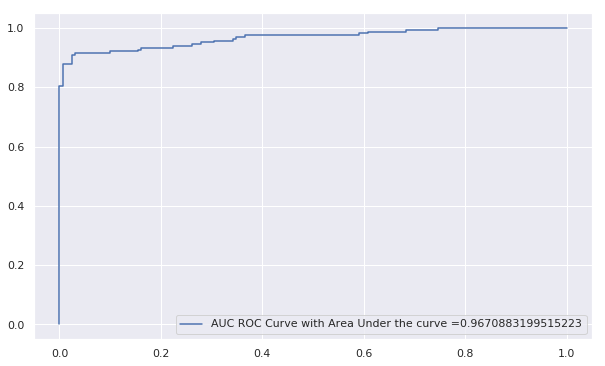

In [0]:
generate_auc_roc_curve(clf, X_test)

Classification Of Algorithms

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [0]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (659, 30) (325, 30) 

Y_shapes:
 Y_train: Y_validation:
 (659, 1) (325, 1)


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [0]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.969932 (0.025346)
LDA: 0.968853 (0.018001)
KNN: 0.690998 (0.061493)
CART: 0.896325 (0.034741)
SVM: 0.609011 (0.030725)
XGB: 0.976876 (0.015023)
RF: 0.966967 (0.022422)


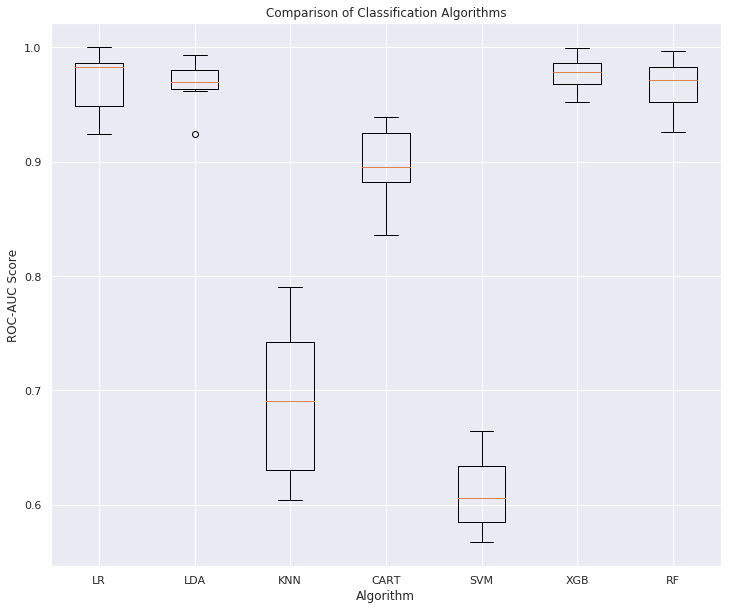

In [0]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [0]:
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')